##導入資料集

In [51]:
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

In [52]:
df = 'ToyotaUsedCars.csv'
if not os.path.isfile(df):
  os.system('wget https://raw.githubusercontent.com/cnchi/datasets/master/'+ df)

In [53]:
import HappyML.preprocessor as pp
dataset = pp.dataset(file=df)

##資料前處理

###切分自、應變數

In [54]:
X, Y = pp.decomposition(dataset=dataset, x_columns=[i for i in range(8)], y_columns=[8])

###類別資料數位化

In [55]:
X = pp.onehot_encoder(X, columns=[0, 2, 4], remove_trap=True)

###切分訓練集、測試集

In [56]:
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8)

###特徵縮放

In [57]:
X_train, X_test = pp.feature_scaling(fit_ary=X_train, transform_arys=(X_train, X_test))

##建構神經網路模型

###建構神經網路各層級

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()

model.add(Dense(input_dim=X_train.shape[1], units=459, kernel_initializer="glorot_normal"))
model.add(Dense(units=206, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=10, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

###模型編譯

In [59]:
model.compile(optimizer="nadam", loss="mse", metrics=["mse"])

##模型訓練與校正

###模型訓練

In [60]:
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=50)

Epoch 1/50
863/863 [==============================] - 6s 4ms/step - loss: 46851796.0000 - mse: 46851796.0000 - val_loss: 6753139.0000 - val_mse: 6753139.0000
Epoch 2/50
863/863 [==============================] - 4s 4ms/step - loss: 4926485.0000 - mse: 4926485.0000 - val_loss: 3331715.0000 - val_mse: 3331715.0000
Epoch 3/50
863/863 [==============================] - 5s 6ms/step - loss: 3535084.7500 - mse: 3535084.7500 - val_loss: 3154870.7500 - val_mse: 3154870.7500
Epoch 4/50
863/863 [==============================] - 4s 4ms/step - loss: 3053119.2500 - mse: 3053119.2500 - val_loss: 2832016.5000 - val_mse: 2832016.5000
Epoch 5/50
863/863 [==============================] - 4s 4ms/step - loss: 2863594.0000 - mse: 2863594.0000 - val_loss: 3654764.0000 - val_mse: 3654764.0000
Epoch 6/50
863/863 [==============================] - 5s 6ms/step - loss: 2757807.7500 - mse: 2757807.7500 - val_loss: 2865700.7500 - val_mse: 2865700.7500
Epoch 7/50
863/863 [==============================] - 4s 4ms/s

###模型校正

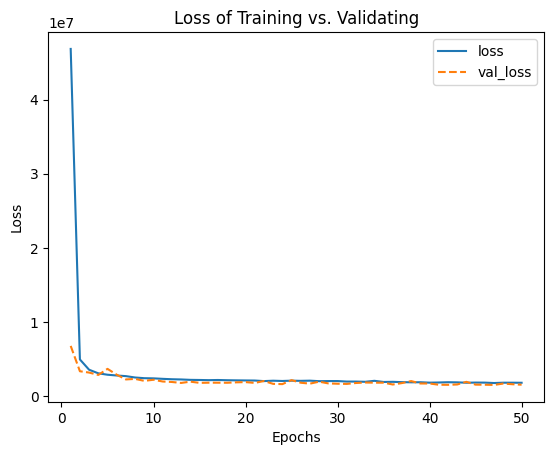

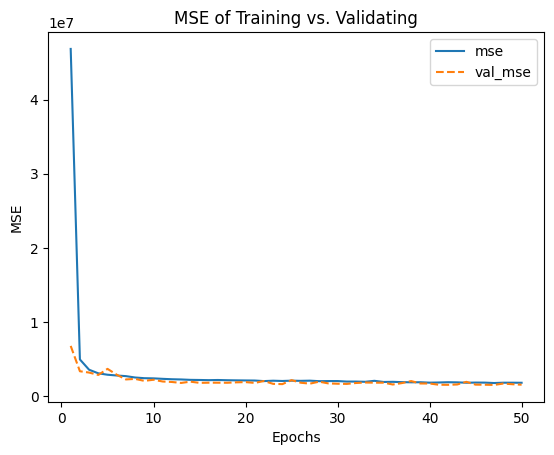

In [61]:
# Model Adjustment
import HappyML.model_drawer as md

md.epochs_metrics_plot(epochs_metrics.history, keys=("loss", "val_loss"), title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

##結論

###印出真實值與預測值

In [62]:
# Predict
import pandas as pd
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# Show the Predict Result
dataframe = pd.concat([Y_test, Y_pred], axis=1)
print(dataframe)

43/43 [==============================] - 0s 2ms/step
      price         price
2654   3495   3370.667480
3195  15911  14113.250000
1847   9995  10088.493164
3317  11000  13750.080078
946    9498   9145.243164
...     ...           ...
2065   8982   8040.636230
1091   4498   4458.559570
4208   9480  10152.028320
6636  27998  29472.923828
2025   7995   8788.486328

[1348 rows x 2 columns]


###模型評估

In [63]:
# Evaluation
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

43/43 [==============================] - 0s 3ms/step - loss: 1885915.5000 - mse: 1885915.5000
Loss of Testing Set: 1885915.5
MSE of Testing Set: 1885915.5
